In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 4.
# Analysis of climate data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Climate indices
# (2) Empirical Orthogonal Functions: sono l'applicazione ai dati geospaziali dell'analisi delle componenti principali

# We will work with datasets from CMIP6 archive; in the examples I will use one of the following cases:
#  psl_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
#  psl_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  psl_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc
# questi file rappresentano delle simulazioni effettuate con diversi modelli climatici per l'esperimento historical, con dati su base mensile dal 1850 al 2014

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1-SOVeb7EoB_nDWcpugyNGTB6RHiRlRnF/view?usp=sharing

# Esercizio 1: Calcolo SOI a risoluzione mensile per due modelli a nostra scelta per il periodo 1950 - 1999

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 1. 
# Calculate the Southern Oscillation Index at monthly resolution 
# for two models of your choice for the period 1950-1999; 
# - plot time series
# - compare with observations (standardized data): "SOI.txt"
# Link: https://www.ncdc.noaa.gov/teleconnections/enso/soi
#       https://www.cpc.ncep.noaa.gov/data/indices/soi
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# questo indice dipende dalle misure di pressione al livello del mare rispetto a due stazioni

# Il Southern Oscillation Index (SOI) è un indice standardizzato basato sulle differenze di pressione a livello del mare osservate tra Tahiti e Darwin, in Australia. Il SOI è una misura delle fluttuazioni su larga scala della pressione atmosferica che si verificano tra il Pacifico tropicale occidentale e orientale (cioè, lo stato dell'oscillazione meridionale) durante gli episodi di El Niño e La Niña. Si può anche affermare che SOI dia un'indicazione dello sviluppo e dell'intensità degli eventi di Niño o Niña nell'Oceano Pacifico.

# Negli anni ’60 gli studiosi si resero conto che El Niño e la Southern Oscillaton sono in realtà correlati e venne coniato il termine ENSO : ovvero El Niño  Southern Oscillation.
# https://www.meteoindiretta.it/giornale-meteo/20867/come-si-descrive-oscillazione-enso-indici-a-confronto/

# Gli episodi di El Niño hanno un SOI negativo, il che significa che c'è una pressione più bassa su Tahiti e una pressione più alta a Darwin.
# Gli episodi di La Niña hanno un SOI positivo, il che significa che c'è una pressione più alta a Tahiti e più bassa a Darwin.

# Lettura dati modelli e selezione variabile psl

In [3]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import numpy as np

import cartopy.crs as ccrs

import xarray as xr

In [4]:
#- Define coordinates of Darwin and Tahiti - sono le 2 stazioni di interesse

lon_Tah = -149.45
lat_Tah = -17.67

lon_Dar = 130.84
lat_Dar = -12.44


In [5]:
# Choice of models

model=['MRI-ESM2-0','MIROC6']  # i modelli scelti

m_variable='C:/Users/loren/Desktop/psl_Amon_'
m_case='_historical_r1i1p1f1_gn_185001-201412.nc'

In [6]:
#- Open & explore the netCDF file for model 1

modfile1=''.join([m_variable,model[0],m_case])

d1 = xr.open_dataset(modfile1,use_cftime=True)
d1

# psl è la variabile che indica la pressione del mare

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:32:52Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            psl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/36275bcc-884a-4960-b367-bd644a1fbb6b

In [7]:
#- Open & explore the netCDF file for model 2

modfile2=''.join([m_variable,model[1],m_case])

d2 = xr.open_dataset(modfile2,use_cftime=True)
d2


<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:09:41Z
    ...                     ...
    variable_id:            psl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/be9ab685-172d-493c-af04-dca3cee0329b
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

In [8]:
# Extract variable and change units (pa to hPa)
# estraiamo dai 2 dataset la variabile che ci interessa

psl1=d1.psl/100 
psl2=d2.psl/100

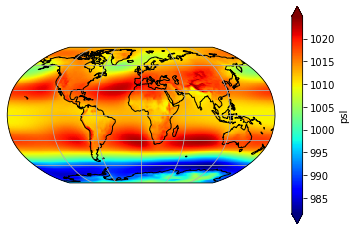

In [13]:
# visual check della prima variabile facendo la media lungo tutto l'asse del tempo (in una cella ho la media del valore di ps in tutti gli anni a disposizione ??)
#- Make a visual check on time-averaged field

p0 = psl1.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet',extend='both')
p0.axes.coastlines()
p0.axes.gridlines()

# Visualizzazione serie storica variabile psl per i due modelli nelle coordinate delle due stazioni definite e calcolo SOI per ciascun modello

0 MRI-ESM2-0
<xarray.DataArray 'psl' (time: 1980)>
array([ 1.15670443,  1.20327016, -0.5036283 , ...,  0.22363903,
        0.69264354,  0.91698089])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
1 MIROC6
<xarray.DataArray 'psl' (time: 1980)>
array([ 0.95919014,  0.99822411, -0.10446652, ..., -0.13164929,
        0.0668734 ,  1.08501497])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00


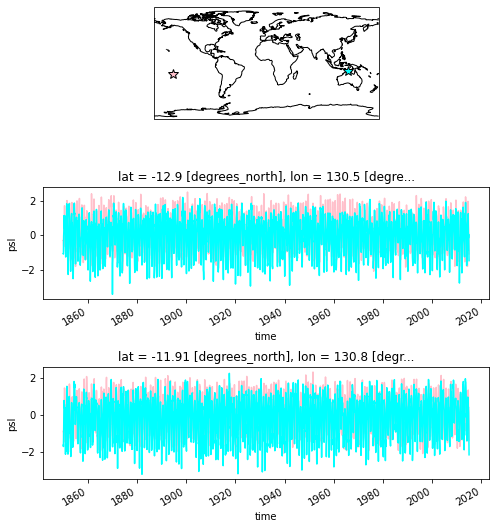

In [19]:
#- Set plot
fig = plt.figure(figsize=(8,12))
subplots = (4,1)
n_panels = subplots[0] * subplots[1]

#- plot station locations
ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines() 
plt.plot([lon_Tah], [lat_Tah],
         color='pink', linewidth=2, marker='*', markersize=10, markeredgecolor='black',
         transform=ccrs.Geodetic())
plt.plot([lon_Dar], [lat_Dar],
         color='cyan', linewidth=2, marker='*', markersize=10, markeredgecolor='black',
         transform=ccrs.Geodetic())

#- Now loop over the two models
for i in (0,1):

  print(i,model[i])

  modfile=''.join([m_variable,model[i],m_case])
  dx = xr.open_dataset(modfile)  # apro il dataset

  #!!!!!!!!!!! focus on the locations of interest delle 2 stazioni, uso il metodo nearest per individuare la cella più vicina (il centroide della cella più vicina alle coordinate delle mie stazioni)
  psl_Tah = dx.psl.sel(lon=lon_Tah, lat=lat_Tah, method='nearest')
  psl_Dar = dx.psl.sel(lon=lon_Dar, lat=lat_Dar, method='nearest')
  
  #- Calculate standardized Tahiti - anomalie standardizzate - vedi formule qui: https://www.ncdc.noaa.gov/teleconnections/enso/soi
  st_Tah = ( psl_Tah - psl_Tah.sel(time=slice("1981-01", "2010-12")).mean() ) / psl_Tah.sel(time=slice("1981-01", "2010-12")).std()  # periodo di riferimento 1981 * 20210
 
  #- Calculate standardized Darwin - anomalie standardizzate
  st_Dar = ( psl_Dar - psl_Dar.sel(time=slice("1981-01", "2010-12")).mean() ) / psl_Dar.sel(time=slice("1981-01", "2010-12")).std()
 
  #- plot time series for the current model
  ax1 = fig.add_subplot(subplots[0], subplots[1], i+2) 
  st_Tah.plot(color='pink')
  st_Dar.plot(color='cyan')
 
  #!!!!!!!!!! Calculate SOI per i due diversi modelli
  MSD = (st_Tah-st_Dar).std()
  if (i==0):
    SOI_1 = st_Tah-st_Dar / MSD ; print(SOI_1)
  else:
    SOI_2 = st_Tah-st_Dar / MSD ; print(SOI_2)

plt.subplots_adjust(hspace=0.6) 
plt.show()  
plt.close()


# vengono plottate le due stazioni per vedere se ho selezionato le coordinate corrette
# due plot per i due modelli, coordinate diverse perchè griglie diverse evidentemente
# darwin in azzurro e thaiti in rosa

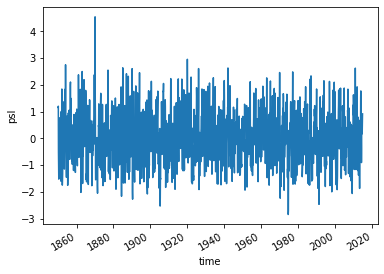

In [23]:
SOI_1.plot()

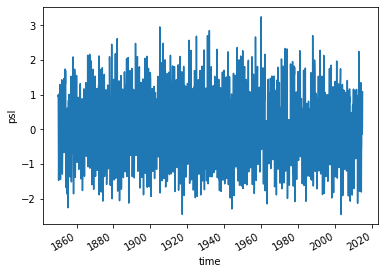

In [24]:
SOI_2.plot()

# Definizione funzione per sistemare formato date

In [12]:
# %load time_middle_of_month
# verrà utilizzata perchè nella parte finale
def time_middle_of_month(beg, end=None, periods=None):
    """ create vector with timestamps in the middle of the month

    Parameters
    ----------
    beg : date or date vector
        Start date. If end is not given and beg is a vector, uses first
        entry a start date and last entry as end date.
    end : date
        If given used as end date.
    periods: integer
        If given, uses 'periods' months from the start date. Note
        Note: 'beg' must be a scalar.

    Examples / Test
    ---------------
    import pytest

    expected = pd.to_datetime(['2018-01-16 12:00:00', '2018-02-15 00:00:00',
                   '2018-03-16 12:00:00', '2018-04-16 00:00:00',
                   '2018-05-16 12:00:00', '2018-06-16 00:00:00',
                   '2018-07-16 12:00:00', '2018-08-16 12:00:00',
                   '2018-09-16 00:00:00', '2018-10-16 12:00:00',
                   '2018-11-16 00:00:00', '2018-12-16 12:00:00'],)

    # -------------------------------------------------------------------------
    # two dates as string
    
    result = time_middle_of_month('2018-01-01', '2018-12-01')
    assert np.all(expected == result)
    
    # -------------------------------------------------------------------------
    # dates from vector

    # yields dates at the end of the month
    time = pd.date_range('2018-01-01', '2018-12-01', freq='M')

    result = time_middle_of_month(time)
    assert np.all(expected == expected)

    # -------------------------------------------------------------------------
    # start date + periods

    time_middle_of_month('2018-01-15', periods=12)  
    assert np.all(expected == expected)

    # =======
    # The following function calls are wrong

    # cannot specify all three arguments
    with pytest.raises(AssertionError):
        time_middle_of_month('2018-01-01', '2018-12-01', 12)

    # beg cannot be a vector if periods is given
    with pytest.raises(AssertionError):
        time_middle_of_month(time, periods=12)


    """

    msg = "Cannot specify 'end' and 'periods'!"
    assert (end is None) or (periods is None), msg

    # if beg is a time vector
    if end is None and periods is None:
        beg = np.asarray(beg)
        end = beg[-1]
        beg = beg[0]

    # '2000-01-01' -> Timestamp
    beg = pd.to_datetime(beg)

    msg = "'beg' cannot be a vector if 'periods' is given"
    assert isinstance(beg, pd.Timestamp), msg


    # sanitize 'beg'; eg '2000-01-31' -> '2000-01-01'
    beg = pd.datetime(beg.year, beg.month, 1)

    if periods is None:
        end = pd.to_datetime(end)
        month_beg = pd.date_range(beg, end, freq='MS')
    else:
        month_beg = pd.date_range(beg, periods=periods, freq='MS')




    month_end = (pd.date_range(beg, freq='M', periods=month_beg.size)
                 + pd.Timedelta('1d'))

    return month_beg + (month_end - month_beg) / 2
  
# =================================================  
# examples  
expected = pd.to_datetime(['2018-01-16 12:00:00', '2018-02-15 00:00:00',
               '2018-03-16 12:00:00', '2018-04-16 00:00:00',
               '2018-05-16 12:00:00', '2018-06-16 00:00:00',
               '2018-07-16 12:00:00', '2018-08-16 12:00:00',
               '2018-09-16 00:00:00', '2018-10-16 12:00:00',
               '2018-11-16 00:00:00', '2018-12-16 12:00:00'],)

###
import pytest

result = time_middle_of_month('2018-01-01', '2018-12-01')
assert np.all(expected == result)
  
  
# yields dates at the end of the month
time = pd.date_range('2018-01-01', '2018-12-01', freq='M')

result = time_middle_of_month(time)
assert np.all(expected == expected)


time_middle_of_month('2018-01-15', periods=12)  
assert np.all(expected == expected)

# =======
# ERROR

# cannot specify all three arguments
with pytest.raises(AssertionError):
    time_middle_of_month('2018-01-01', '2018-12-01', 12)

with pytest.raises(AssertionError):
    time_middle_of_month(time, periods=12)

C:\Users\loren\AppData\Local\Temp\ipykernel_12700\3191921561.py:79: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  beg = pd.datetime(beg.year, beg.month, 1)
C:\Users\loren\AppData\Local\Temp\ipykernel_12700\3191921561.py:79: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  beg = pd.datetime(beg.year, beg.month, 1)
C:\Users\loren\AppData\Local\Temp\ipykernel_12700\3191921561.py:79: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  beg = pd.datetime(beg.year, beg.month, 1)


# Lettura osservazioni SOI vere

In [13]:
# Get observational-based SOI

# leggo la tabella che ho come dati in input

#- Read in the 2D table as a numpy array, which I can later reshape into 1D

loc_data_2d = np.genfromtxt('SOI.txt', skip_header=1, filling_values='-99.0', delimiter=None, dtype='float')[:,1:13]  #[rows,cols]
loc_data_1d = loc_data_2d.flatten()  # ho convertito la tabella da 2d a 1d

loc_data_years = np.genfromtxt('SOI.txt', skip_header=1, delimiter=None, dtype='int')[:,0]  #[rows,cols]  # ho letto gli anni che erano contenuti nella prima colonna
print(loc_data_years[0],loc_data_years[-1]) 


# Build time axis

# si costruisce un asse temporale


y0=''.join([str(loc_data_years[0]),'-01'])

y1=''.join([str(loc_data_years[-1]+1),'-01'])
taxis1 = pd.date_range(y0,y1,freq='m')

y2=''.join([str(loc_data_years[-1]),'-12'])
taxis2 = pd.date_range(y0,y1,freq='MS')

taxis=time_middle_of_month(y0, end=y2, periods=None)

print(y0,y1,y2)
print(taxis1,taxis2,taxis)

    
# Build xarray dataset, using time as the coordinate
# che usa i dati letti e l'asse temporale pre scelto
  
SOI_obs = xr.Dataset(data_vars={'SOI': (['time'], np.asarray(loc_data_1d))},
                     coords={'time': (['time'], taxis)})

SOI_obs#.plot()

1951 2021
1951-01 2022-01 2021-12
DatetimeIndex(['1951-01-31', '1951-02-28', '1951-03-31', '1951-04-30',
               '1951-05-31', '1951-06-30', '1951-07-31', '1951-08-31',
               '1951-09-30', '1951-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=852, freq='M') DatetimeIndex(['1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', length=853, freq='MS') DatetimeIndex(['1951-01-16 12:00:00', '1951-02-15 00:00:00',
    

C:\Users\loren\AppData\Local\Temp\ipykernel_12700\3191921561.py:79: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  beg = pd.datetime(beg.year, beg.month, 1)


<xarray.Dataset>
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-16T12:00:00 ... 2021-12-16T12:00:00
Data variables:
    SOI      (time) float64 1.5 0.9 -0.1 -0.3 -0.7 0.2 ... 0.6 0.8 0.7 1.0 1.5

# Confronto SOI da osservazioni, da mod1, da mod2

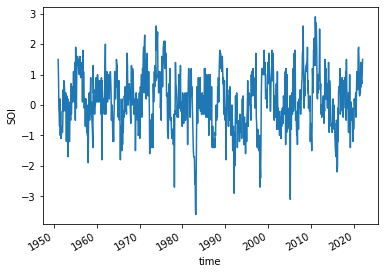

In [18]:
SOI_obs.SOI.plot()

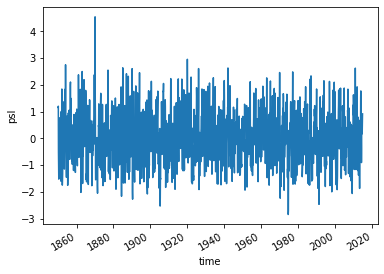

In [19]:
SOI_1.plot()  # SOI calcolato dal modello 1

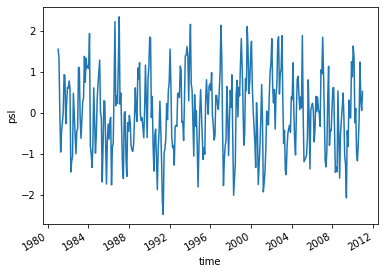

In [20]:
SOI_1.sel(time=slice("1981-01", "2010-12")).plot()  # seleziono un periodo di riferimento

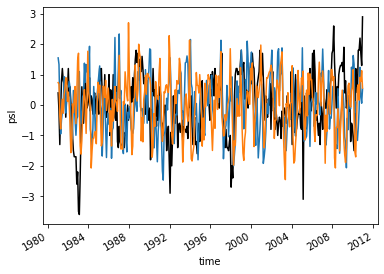

In [21]:
# Compare SOI from observations and model simulations

t0="1981-01" ; t1="2010-12"  # uso un determinato periodo

p0=SOI_obs.SOI.sel(time=slice(t0,t1)).plot(color='black')
SOI_1.sel(time=slice(t0,t1)).plot()
SOI_2.sel(time=slice(t0,t1)).plot()

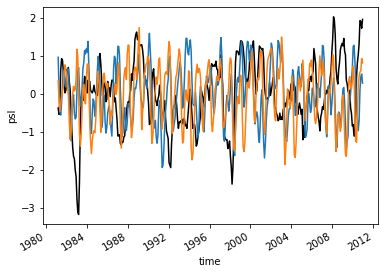

In [22]:
# Compare SOI from observations and model simulations, qui è stata utilizzata una media mobile per smussare un po i dati

p0=SOI_obs.SOI.sel(time=slice(t0,t1)).rolling(time=3).mean().plot(color='black')
SOI_1.sel(time=slice(t0,t1)).rolling(time=3).mean().plot()
SOI_2.sel(time=slice(t0,t1)).rolling(time=3).mean().plot()

# Calcolo coefficiente di correlazione di Pearson

In [23]:
# Calculate Pearson's correlation coefficients, si calcola uan correlazione tra le serie temporali: per fare ciò dobbiamo avere esattamente gli stessi indici, magari per un modello la data del mese X viene indicata con la data di mezzo, un altro modello usa l'ultimo giorno e cosi via, possono esserci scelte diverse. Dobbiamo avere le stesse etichette per essere in grado di fare dei confronti
# i nostri modelli avevano come dimensione tempo la metà del mese. Si utlizza la funzione definita sopra

print(xr.corr(SOI_obs.SOI.sel(time=slice(t0,t1)),
              SOI_1.sel(time=slice(t0,t1))),
      
      xr.corr(SOI_obs.SOI.sel(time=slice(t0,t1)),
              SOI_2.sel(time=slice(t0,t1))),
      
      xr.corr(SOI_1.sel(time=slice(t0,t1)),
              SOI_2.sel(time=slice(t0,t1)))
     )

<xarray.DataArray ()>
array(0.01185802) <xarray.DataArray ()>
array(-0.05166531) <xarray.DataArray 'psl' ()>
array(0.46320453)
